In [11]:
#loading library and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from numpy.random import RandomState

data = pd.read_csv("data/student-mat.csv")


## Exploratory Data Analaysis

In [49]:
#check missing data -> There are no missing data
print(f"Lenght: {len(data)}")
print(f"Shape: {data.shape}")
print(f"Columns: {data.columns}")
#data.isnull().any()

Lenght: 395
Shape: (395, 34)
Columns: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Final Grade'],
      dtype='object')


### Age & Gender

<AxesSubplot:xlabel='Final Grade', ylabel='count'>

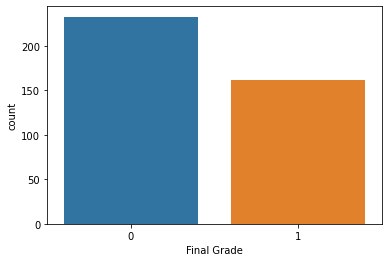

In [72]:
### Marking Final Grade as Categorical Value & Viewing their Count
data['Final Grade'] = np.where(data['G3'] >= 12, 'Pass', 'Fail')
data['Final Grade'].replace(['Fail', 'Pass'],[0, 1], inplace=True)
sns.countplot(x = 'Final Grade',  data = data)

/Users/juliachu/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


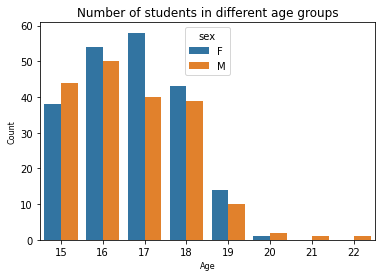

In [87]:
#Age distribution 
#data['age'].unique()
age_pl = sns.countplot('age',hue='sex', data=data)
age_pl.axes.set_title('Number of students in different age groups',fontsize=12)
age_pl.set_xlabel("Age",fontsize=8)
age_pl.set_ylabel("Count",fontsize=8)
plt.show()

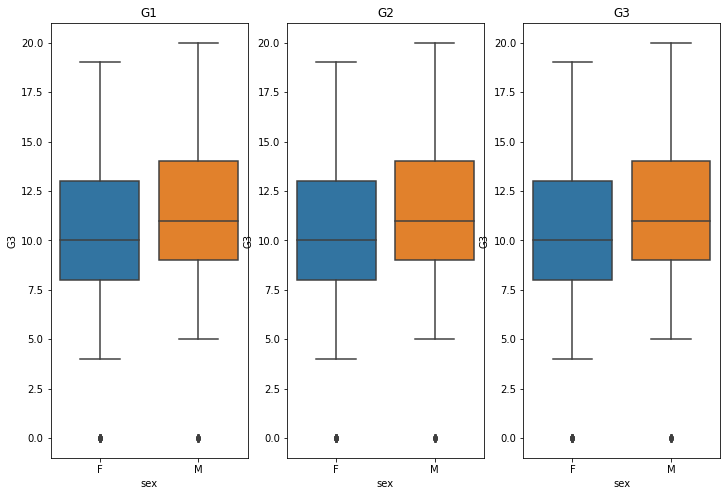

In [82]:
#Whether there's a gender difference in grade distribution in G3
fig, axes = plt.subplots(1, 3, figsize= (12, 8))
ax1 = sns.boxplot(data= data, x= 'sex', y= 'G3', ax= axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data= data, x= 'sex', y= 'G3', ax= axes[1])
ax2.set_title('G2')
ax3 = sns.boxplot(data= data, x= 'sex', y= 'G3', ax= axes[2])
ax3.set_title('G3')
plt.show()

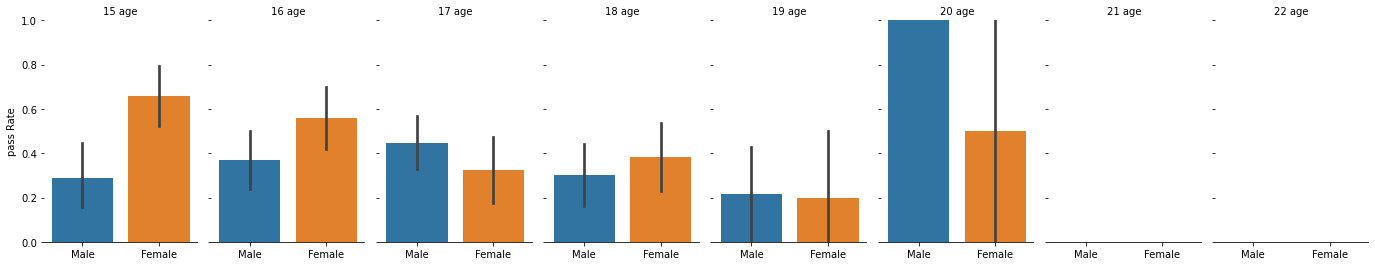

In [81]:
g = sns.catplot(
    data=data, x="sex", y="Final Grade", col="age",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "pass Rate")
g.set_xticklabels(["Male", "Female"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

### Address: Rural / Urban

Text(0, 0.5, 'Count')

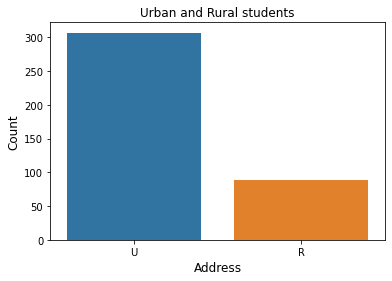

In [90]:
add_plt = sns.countplot(data = data, x ='address')
add_plt.axes.set_title('Urban and Rural students', fontsize = 12)
add_plt.set_xlabel('Address', fontsize = 12)
add_plt.set_ylabel('Count', fontsize = 12)

### Train Test Split

In [55]:
#Sample the data into train, test split 
rng = RandomState()
train = data.sample(frac=0.7, random_state=rng)
test = data.loc[~data.index.isin(train.index)]

# display(train.shape)
# display(test.shape)

#Saves the two dataframe to project directory 

#train.to_csv("train.csv", index=False)
#test.to_csv("test.csv", index=False)
train = train.drop(columns=['G3'])
test = test.drop(columns=['G3'])
train['Final Grade'].replace(['Fail', 'Pass'],[0, 1], inplace=True)
test['Final Grade'].replace(['Fail', 'Pass'],[0, 1], inplace=True)

<AxesSubplot:>

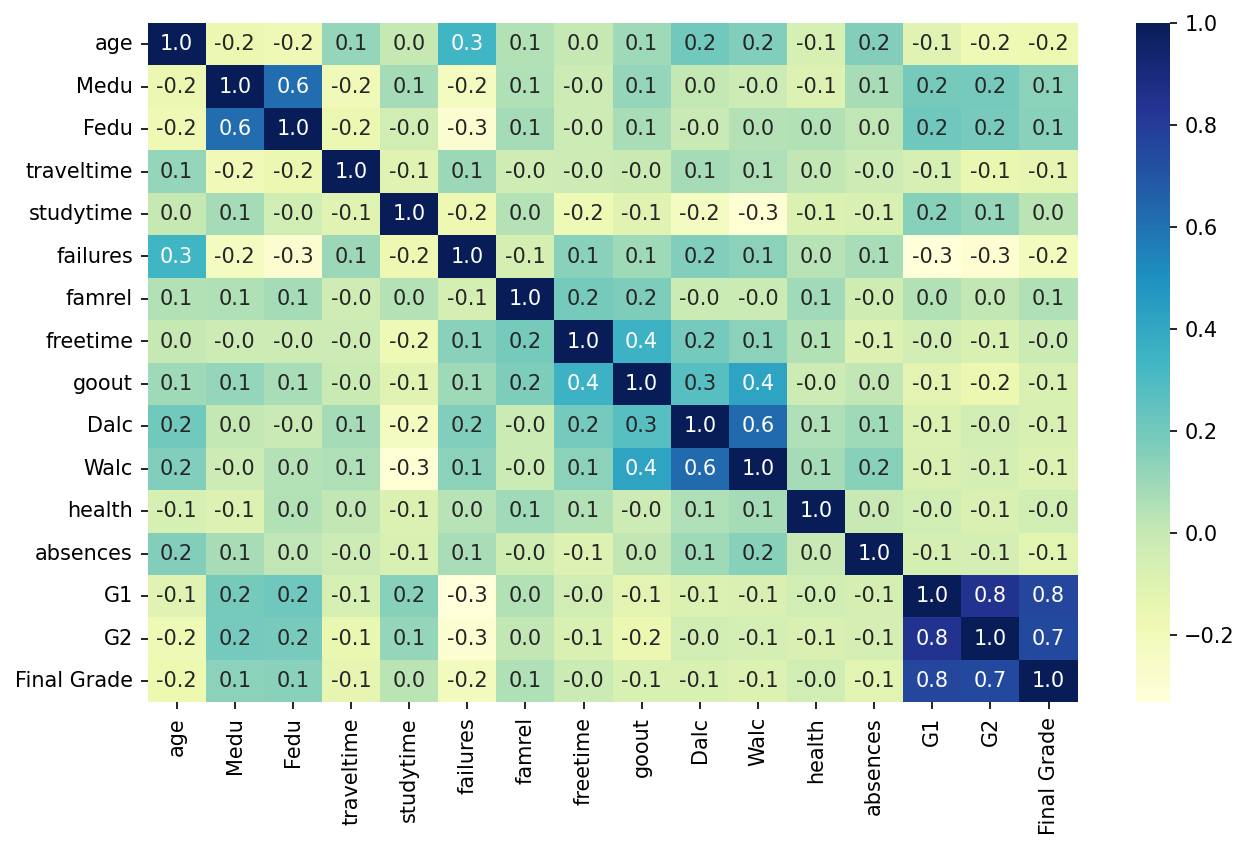

In [57]:
plt.figure(figsize = (10,6), dpi = 150)
sns.heatmap(train.corr(), annot = True, fmt = ".1f", cmap = "YlGnBu")

### Basic Logistic Regression Model

Questions in Mind:
- why does changing G3 to Final Grade binary encoding decreases the correlation coeffcieint of 'failures' with outcome var (if you do heatmap on `data` instead of `train`, `failures` have a correlation coefficient of 0.4)

In [ ]:
basic_best_feat = ['G1', "G2", "failures"]